In [9]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

import json
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

from scipy.optimize import curve_fit
import scipy as sy
import seaborn as sns
from IPython.core.debugger import set_trace
from ipywidgets import interact, interactive, fixed, interact_manual
from tqdm import tqdm_notebook as tqdm

In [10]:
root_folder='./contour_exp1/data/'

# 0. Extract the Data

In [11]:
all_participants_txt=[]
for f in os.listdir(root_folder):
    if('.txt' in f):
        all_participants_txt.append(os.path.join(root_folder,f))

all_participants_json=[]
for i in range(len(all_participants_txt)):
    all_participants_json.append(json.load(open(all_participants_txt[i])))

    
all_participants_df=[]
for i in range(len(all_participants_json)):
    all_participants_df.append(pd.DataFrame(all_participants_json[i]['trialData']))
    
    
all_participants_exp_filename=[]
for i in range(len(all_participants_json)):
    all_participants_exp_filename.append(all_participants_json[i]['file_name'].split('/')[-1])


all_participants_observation=[]
for df in all_participants_df:
    beta_val=np.array(df.betaVal)
    response_val=np.array(df.responseCorrect)

    acc_values=[]
    for val in np.unique(np.array(df.betaVal)):
        pos=np.where(beta_val==val)[0]
        # print(val,np.mean(response_val[pos]))
        acc_values.append(np.mean(response_val[pos]))
    acc_values=np.array(acc_values)
    all_participants_observation.append(acc_values)
all_participants_observation=np.array(all_participants_observation)



beta_conditions=np.unique(np.array(all_participants_df[0].betaVal))
num_conditions=len(beta_conditions)
total_num_participants=all_participants_observation.shape[0]

In [12]:
print(len(all_participants_txt))
print(len(all_participants_json))
print(len(all_participants_df))
print(len(all_participants_exp_filename))
print(len(beta_conditions))
print(num_conditions)

print(all_participants_observation.shape)

108
108
108
108
5
5
(108, 5)


# 1. Subjects across stratified json splits

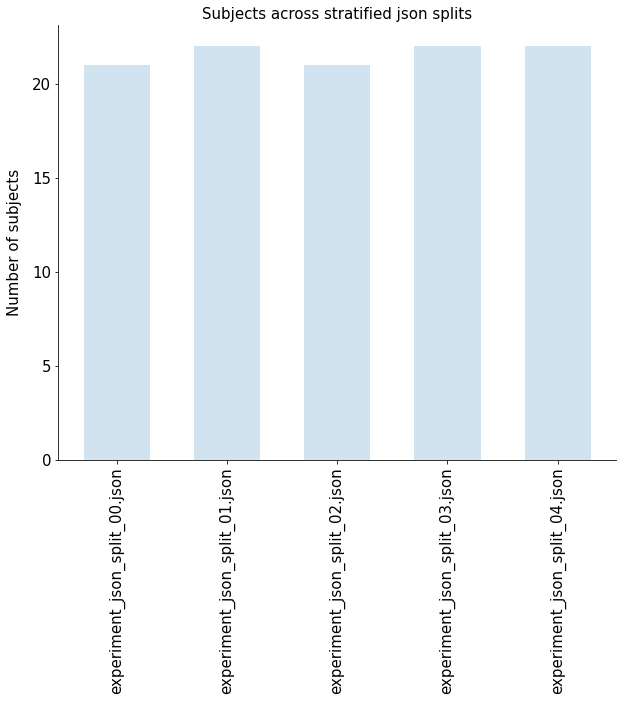

In [13]:
print('\n\n')
plt.figure(figsize=(10,8))
xpos=np.arange(len(np.unique(all_participants_exp_filename,return_counts=True)[0])) + 1
plt.gca().bar(xpos, np.unique(all_participants_exp_filename,return_counts=True)[1], align='center', width=0.6, alpha=0.2, ecolor='gray', capsize=4)
plt.xticks(xpos,np.unique(all_participants_exp_filename,return_counts=True)[0],rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Number of subjects',fontsize=15,labelpad=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Subjects across stratified json splits',fontsize=15)
plt.show()

# 2. Average accuracy of each subject at each beta condition

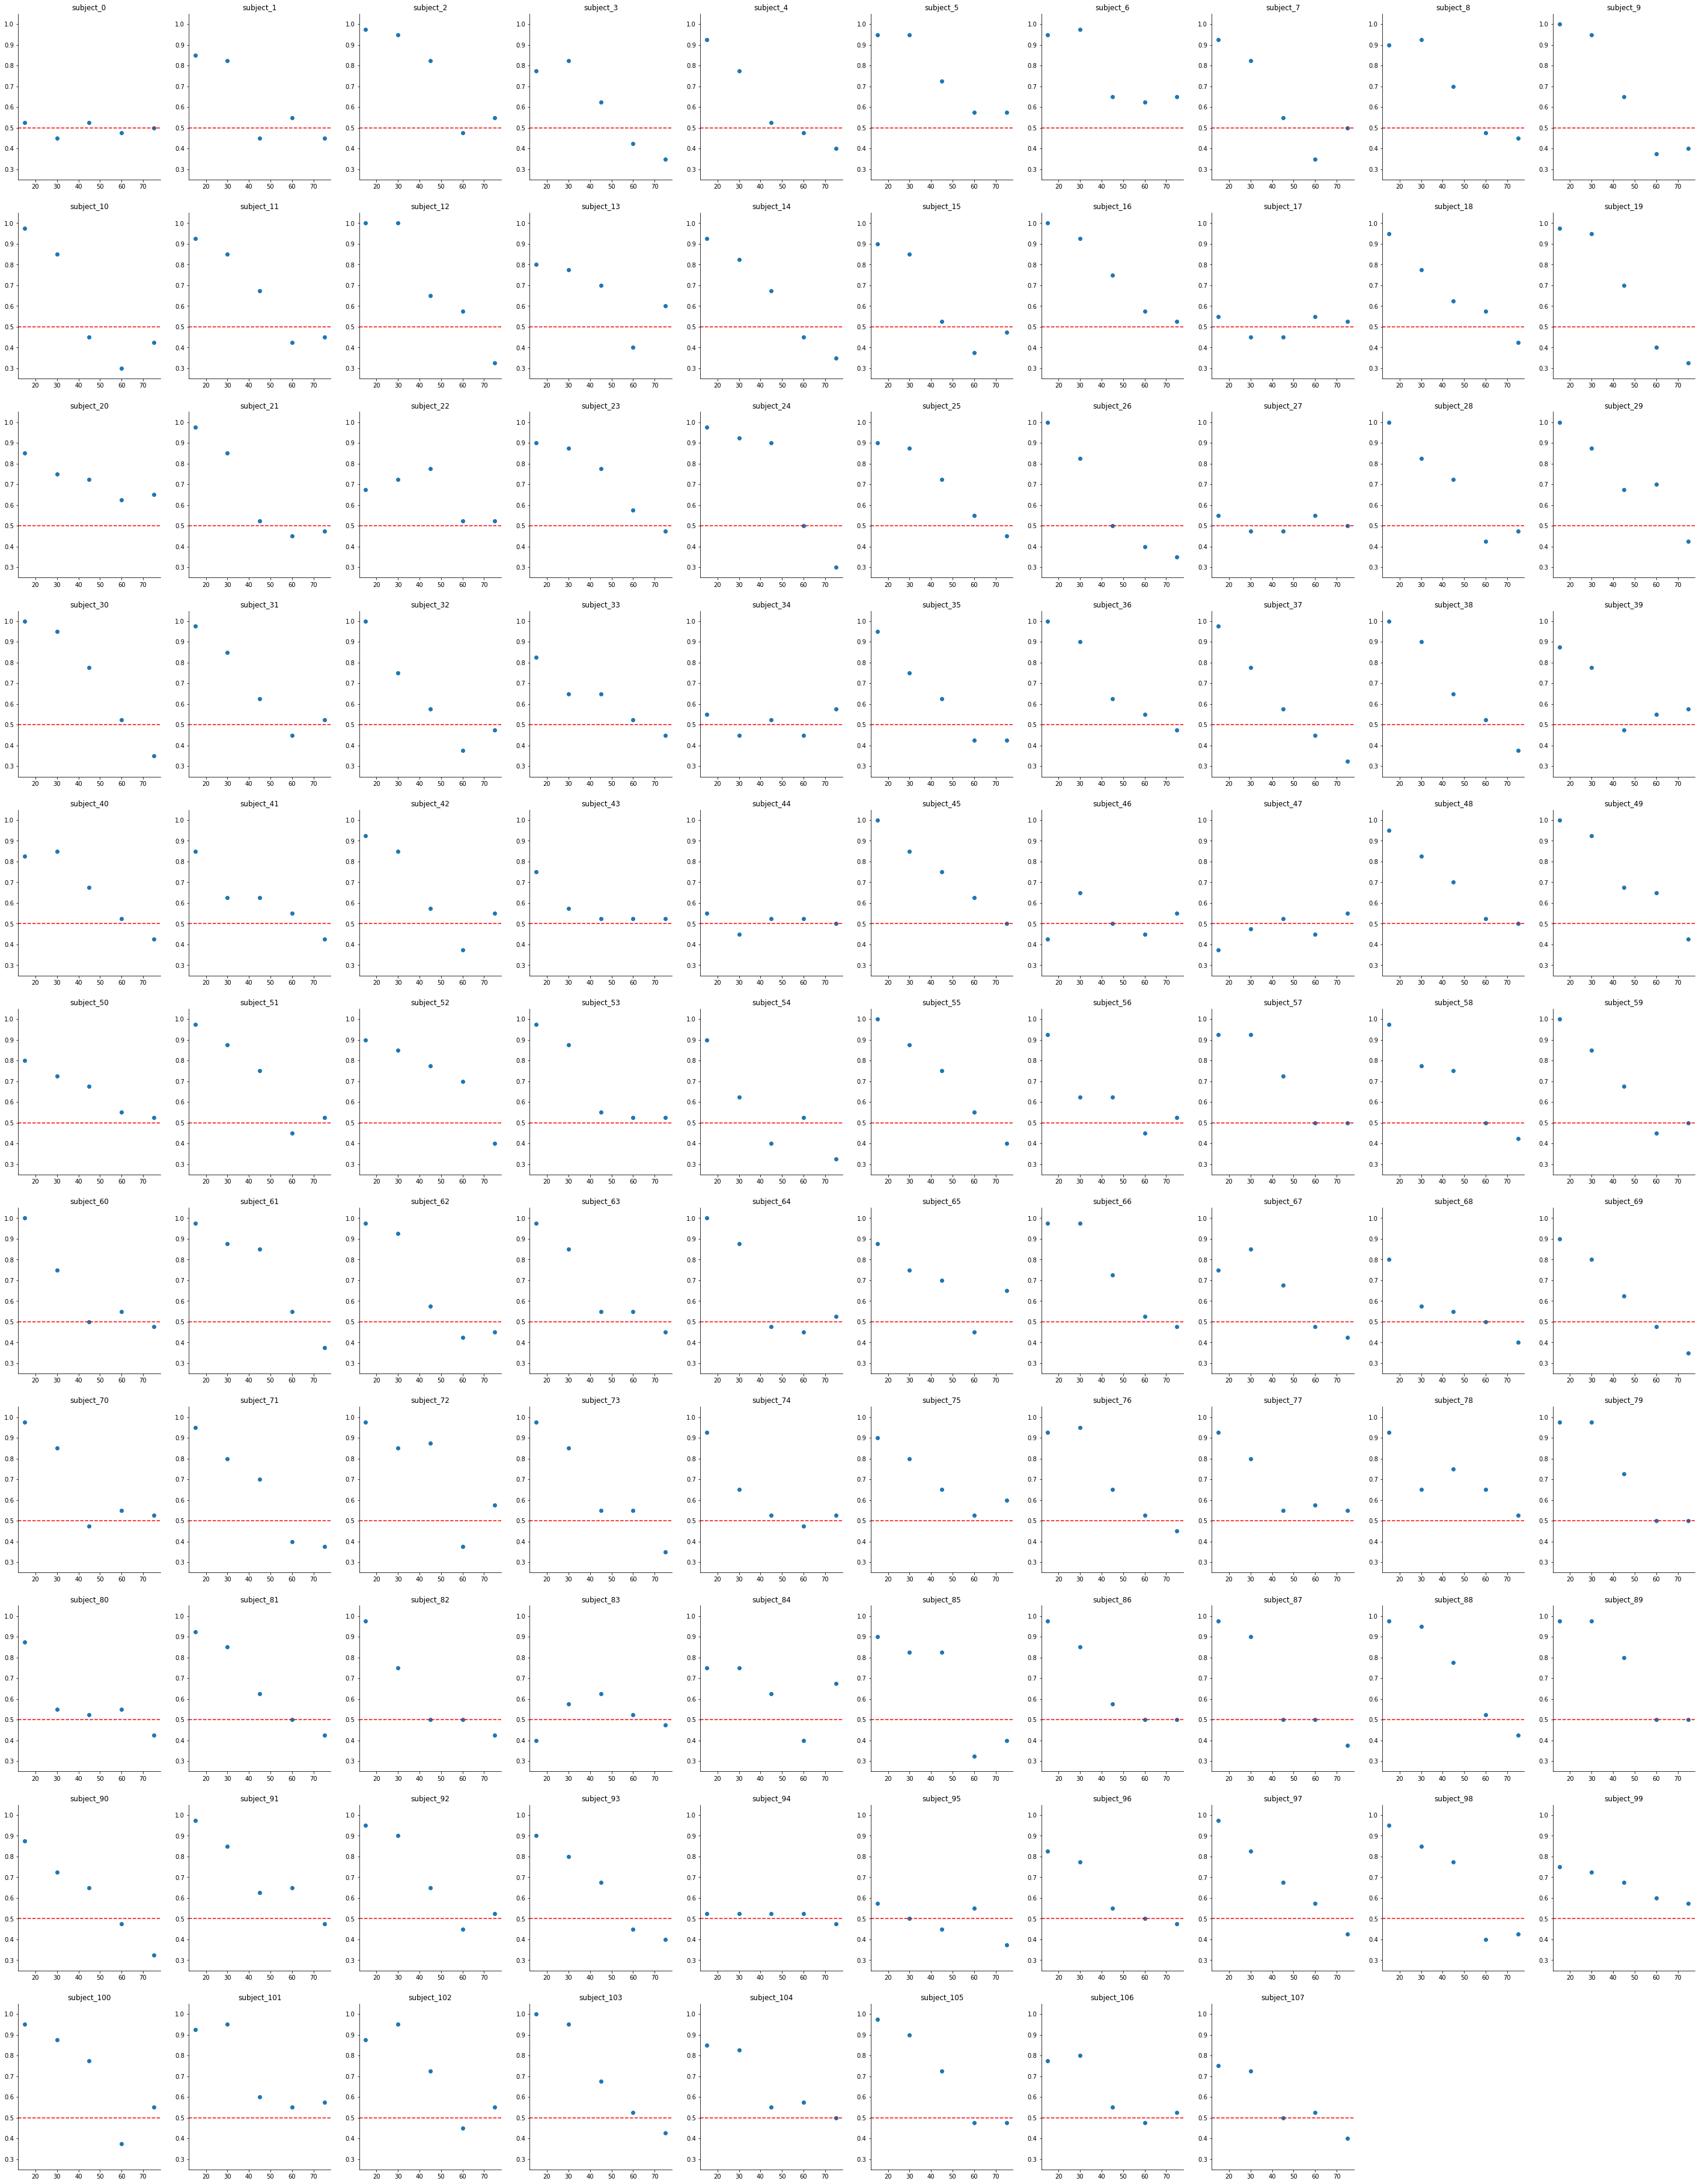

In [14]:
num_cols = 10
num_rows = len(all_participants_observation) // num_cols 
if(len(all_participants_observation)%num_cols!=0):
    num_rows+=1

plt.figure(figsize=(num_cols*5,num_rows*6))
for i in range(all_participants_observation.shape[0]):
    plt.subplot(num_rows,num_cols,i+1)
    plt.scatter(beta_conditions,all_participants_observation[i])
    # x_pos=np.linspace(beta_conditions[0],beta_conditions[-1],1000)
    # plt.plot(x_pos,pf(x_pos,all_participants_parameters[i][0],all_participants_parameters[i][1],all_participants_parameters[i][2]))
    plt.axhline(y=0.5,linestyle='dashed',color='red',label='chance')
    plt.title('subject_'+str(i))
    plt.ylim(np.min(all_participants_observation) - 0.05 ,np.max(all_participants_observation) + 0.05)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)


# 3. Average accuracy distribution at each beta condition

Average accuracy for each beta condition


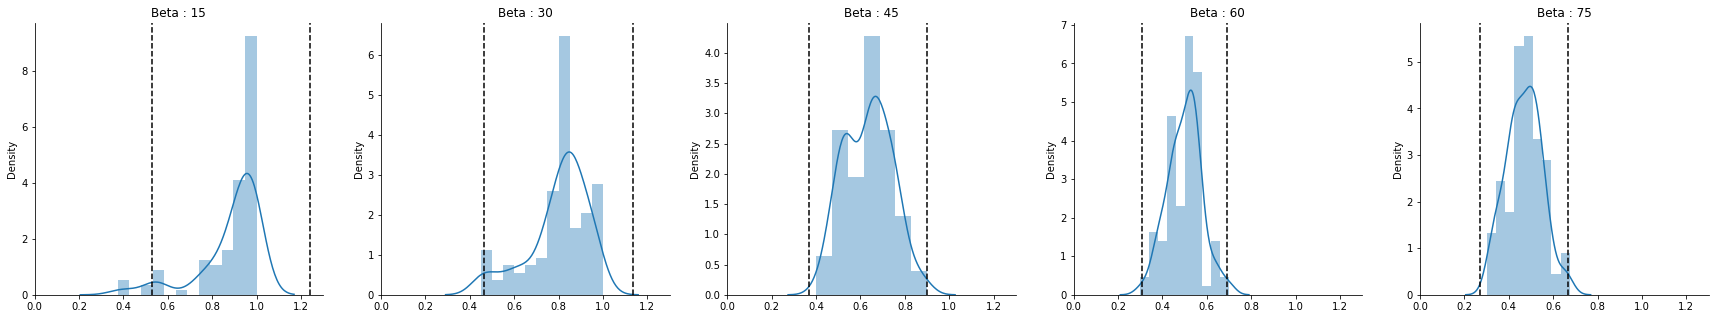

In [15]:
print('Average accuracy for each beta condition')
plt.figure(figsize=(30,5))

for b in range(all_participants_observation.shape[1]):
    plt.subplot(1,5,b+1)
    sns.distplot(all_participants_observation[:,b])
    plt.xlim(0.0,1.3)
    
    plt.axvline(np.mean(all_participants_observation[:,b]) - 2.5 * np.std(all_participants_observation[:,b]),linestyle='--',color='k')
    plt.axvline(np.mean(all_participants_observation[:,b]) + 2.5 * np.std(all_participants_observation[:,b]),linestyle='--',color='k')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    
    plt.title('Beta : ' + str(beta_conditions[b]))


# 4. Average accuracy distribution overall

Text(0.5, 1.0, 'Overall Average accuracy')

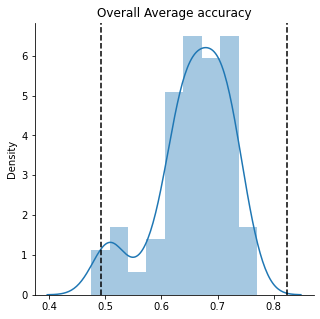

In [16]:
acc_avg_across_beta=np.mean(all_participants_observation,1)

plt.figure(figsize=(5,5))
sns.distplot(acc_avg_across_beta)
plt.axvline(np.mean(acc_avg_across_beta) - 2.5 * np.std(acc_avg_across_beta),linestyle='--',color='k')
plt.axvline(np.mean(acc_avg_across_beta) + 2.5 * np.std(acc_avg_across_beta),linestyle='--',color='k')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Overall Average accuracy')

In [17]:
print(np.where(acc_avg_across_beta<(np.mean(acc_avg_across_beta) - 2.5*np.std(acc_avg_across_beta)))[0])

[47 95]


In [18]:
print(np.where(acc_avg_across_beta>(np.mean(acc_avg_across_beta) + 2.5*np.std(acc_avg_across_beta)))[0])

[]


# 5. Outlier Removal

In [19]:
print(len(all_participants_txt))
print(len(all_participants_json))
print(len(all_participants_df))
print(len(all_participants_exp_filename))
print(len(beta_conditions))
print(num_conditions)

print(all_participants_observation.shape)

108
108
108
108
5
5
(108, 5)


## 5a) Exclusion via overall accuracy

#### Before

Text(0.5, 1.0, 'Average accuracy of every person')

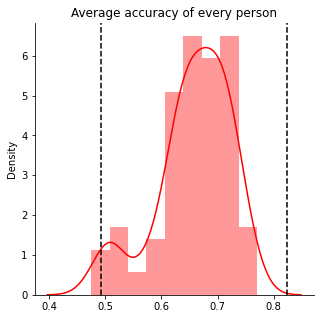

In [20]:
acc_avg_across_beta=np.mean(all_participants_observation,1)

plt.figure(figsize=(5,5))
sns.distplot(acc_avg_across_beta,color='r')
plt.axvline(np.mean(acc_avg_across_beta) - 2.5 * np.std(acc_avg_across_beta),linestyle='--',color='k')
plt.axvline(np.mean(acc_avg_across_beta) + 2.5 * np.std(acc_avg_across_beta),linestyle='--',color='k')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Average accuracy of every person')

#### After

In [21]:
def recursive_remove_outliers_avgacc(t,all_participants_txt,all_participants_json,all_participants_df,all_participants_exp_filename):
    overall_mean=np.mean(t,1)
    count=0
    
    outlier_pos=np.where(np.logical_or(overall_mean<np.mean(overall_mean) - 2.5*np.std(overall_mean),
                       overall_mean>np.mean(overall_mean) + 2.5*np.std(overall_mean)))[0]
    
    if(len(outlier_pos)!=0):
        count+=1
        print('Removed once ',len(outlier_pos),'participants')
        
        t=np.delete(t,outlier_pos,0)
        
        all_participants_txt = np.delete(all_participants_txt,outlier_pos,0)
        all_participants_json = np.delete(all_participants_json,outlier_pos,0)
        all_participants_df = [df for k, df in enumerate(all_participants_df) if k not in outlier_pos]
        # all_participants_df = np.delete(all_participants_df,outlier_pos,0)
        
        all_participants_exp_filename = np.delete(all_participants_exp_filename,outlier_pos,0)
        
        
        t,all_participants_txt,all_participants_json,all_participants_df,all_participants_exp_filename=recursive_remove_outliers_avgacc(t,all_participants_txt,all_participants_json,all_participants_df,all_participants_exp_filename)
    else:
        return (t,all_participants_txt,all_participants_json,all_participants_df,all_participants_exp_filename)
    
    return t,all_participants_txt,all_participants_json,all_participants_df,all_participants_exp_filename
    

In [22]:
all_participants_observation,all_participants_txt,all_participants_json,all_participants_df,all_participants_exp_filename=recursive_remove_outliers_avgacc(all_participants_observation,
                                                                                                                     all_participants_txt,
                                                                                                                      all_participants_json,
                                                                                                                      all_participants_df,all_participants_exp_filename)


Removed once  2 participants
Removed once  2 participants
Removed once  5 participants
Removed once  1 participants
Removed once  1 participants


Text(0.5, 1.0, 'Average accuracy of every person')

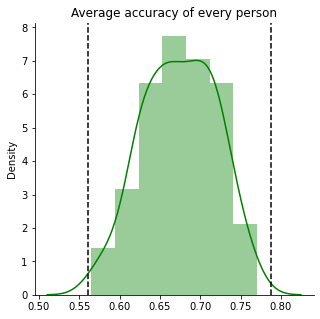

In [23]:
acc_avg_across_beta=np.mean(all_participants_observation,1)

plt.figure(figsize=(5,5))
sns.distplot(acc_avg_across_beta,color='g')
plt.axvline(np.mean(acc_avg_across_beta) - 2.5 * np.std(acc_avg_across_beta),linestyle='--',color='k')
plt.axvline(np.mean(acc_avg_across_beta) + 2.5 * np.std(acc_avg_across_beta),linestyle='--',color='k')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Average accuracy of every person')

In [24]:
print(len(all_participants_txt))
print(len(all_participants_json))
print(len(all_participants_df))
print(len(all_participants_exp_filename))
print(len(beta_conditions))
print(num_conditions)

print(all_participants_observation.shape)

97
97
97
97
5
5
(97, 5)


## 5b) Exclusion via correlation across beta

#### Before

Text(0.5, 1.0, 'Correlation of 1 vs group')

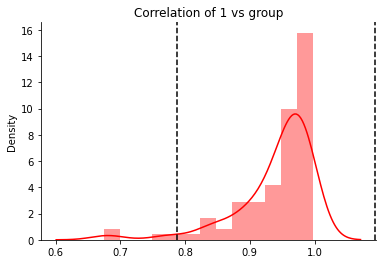

In [25]:
all_partcipants_betawise_corr=[]
for i in range(all_participants_observation.shape[0]):
    current_particpant=all_participants_observation[i,:]
    
    remaining_participant=np.delete(all_participants_observation, i, axis=0)
    remaining_participant=np.mean(remaining_participant,0)
    
    all_partcipants_betawise_corr.append(np.corrcoef(current_particpant,remaining_participant)[0][1])

sns.distplot(all_partcipants_betawise_corr,color='r')
plt.axvline(np.mean(all_partcipants_betawise_corr) - 2.5 * np.std(all_partcipants_betawise_corr),linestyle='--',color='k')
plt.axvline(np.mean(all_partcipants_betawise_corr) + 2.5 * np.std(all_partcipants_betawise_corr),linestyle='--',color='k')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Correlation of 1 vs group')

#### After

In [26]:
def recursive_remove_outliers_betacorr(t,all_participants_txt,all_participants_json,all_participants_df,all_participants_exp_filename):
    
    
    
    
    all_partcipants_betawise_corr=[]
    for i in range(t.shape[0]):
        current_particpant=t[i,:]

        remaining_participant=np.delete(t, i, axis=0)
        remaining_participant=np.mean(remaining_participant,0)

        all_partcipants_betawise_corr.append(np.corrcoef(current_particpant,remaining_participant)[0][1])
        
    
    
    count=0
    
    outlier_pos=np.where(np.logical_or(all_partcipants_betawise_corr<np.mean(all_partcipants_betawise_corr) - 2.5*np.std(all_partcipants_betawise_corr),
                       all_partcipants_betawise_corr>np.mean(all_partcipants_betawise_corr) + 2.5*np.std(all_partcipants_betawise_corr)))[0]
    
    if(len(outlier_pos)!=0):
        count+=1
        print('Removed once ',len(outlier_pos),'participants')
        
        t=np.delete(t,outlier_pos,0)
        
        all_participants_txt = np.delete(all_participants_txt,outlier_pos,0)
        all_participants_json = np.delete(all_participants_json,outlier_pos,0)
        all_participants_df = [df for k, df in enumerate(all_participants_df) if k not in outlier_pos]
        # all_participants_df = np.delete(all_participants_df,outlier_pos,0)
        all_participants_exp_filename = np.delete(all_participants_exp_filename,outlier_pos,0)
        
        
        t,all_participants_txt,all_participants_json,all_participants_df,all_participants_exp_filename=recursive_remove_outliers_betacorr(t,all_participants_txt,all_participants_json,all_participants_df,all_participants_exp_filename)
    else:
        return (t,all_participants_txt,all_participants_json,all_participants_df,all_participants_exp_filename)
    
    return t,all_participants_txt,all_participants_json,all_participants_df,all_participants_exp_filename
    

In [27]:
all_participants_observation,all_participants_txt,all_participants_json,all_participants_df,all_participants_exp_filename=recursive_remove_outliers_betacorr(all_participants_observation,
                                                                                                                     all_participants_txt,
                                                                                                                      all_participants_json,
                                                                                                                      all_participants_df,all_participants_exp_filename)


Removed once  4 participants
Removed once  4 participants
Removed once  3 participants
Removed once  1 participants
Removed once  1 participants
Removed once  2 participants
Removed once  2 participants
Removed once  2 participants


Text(0.5, 1.0, 'Correlation of 1 vs group')

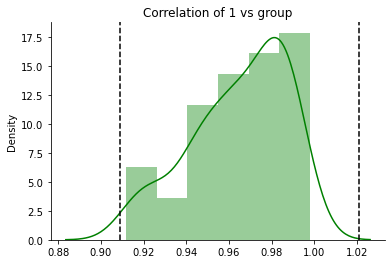

In [28]:
all_partcipants_betawise_corr=[]
for i in range(all_participants_observation.shape[0]):
    current_particpant=all_participants_observation[i,:]
    
    remaining_participant=np.delete(all_participants_observation, i, axis=0)
    remaining_participant=np.mean(remaining_participant,0)
    
    all_partcipants_betawise_corr.append(np.corrcoef(current_particpant,remaining_participant)[0][1])

sns.distplot(all_partcipants_betawise_corr,color='g')
plt.axvline(np.mean(all_partcipants_betawise_corr) - 2.5 * np.std(all_partcipants_betawise_corr),linestyle='--',color='k')
plt.axvline(np.mean(all_partcipants_betawise_corr) + 2.5 * np.std(all_partcipants_betawise_corr),linestyle='--',color='k')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Correlation of 1 vs group')

Average accuracy for each beta condition


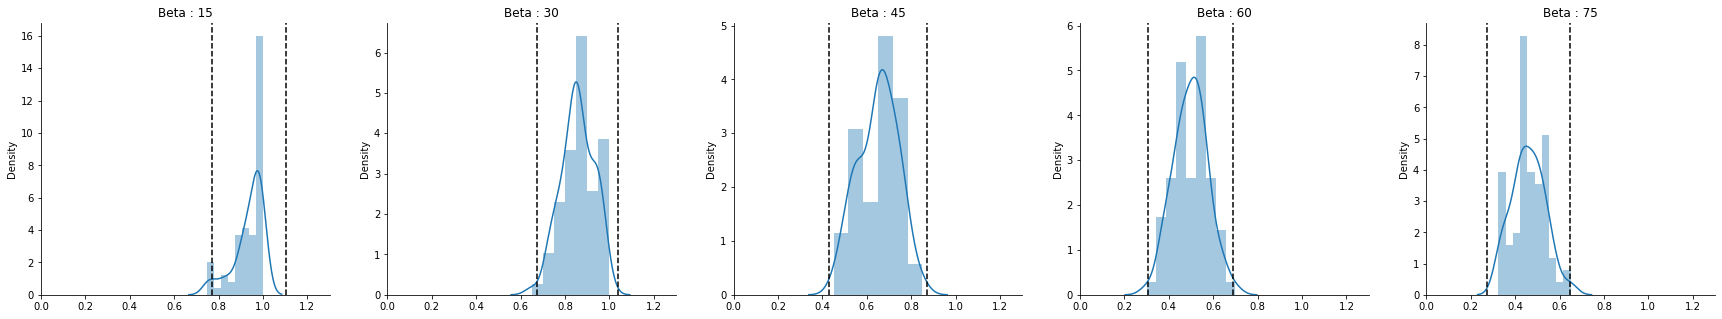

In [29]:
print('Average accuracy for each beta condition')
plt.figure(figsize=(30,5))

for b in range(all_participants_observation.shape[1]):
    plt.subplot(1,5,b+1)
    sns.distplot(all_participants_observation[:,b])
    plt.xlim(0.0,1.3)
    
    plt.axvline(np.mean(all_participants_observation[:,b]) - 2.5 * np.std(all_participants_observation[:,b]),linestyle='--',color='k')
    plt.axvline(np.mean(all_participants_observation[:,b]) + 2.5 * np.std(all_participants_observation[:,b]),linestyle='--',color='k')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    
    plt.title('Beta : ' + str(beta_conditions[b]))


In [30]:
print(len(all_participants_txt))
print(len(all_participants_json))
print(len(all_participants_df))
print(len(all_participants_exp_filename))
print(len(beta_conditions))
print(num_conditions)

print(all_participants_observation.shape)

78
78
78
78
5
5
(78, 5)


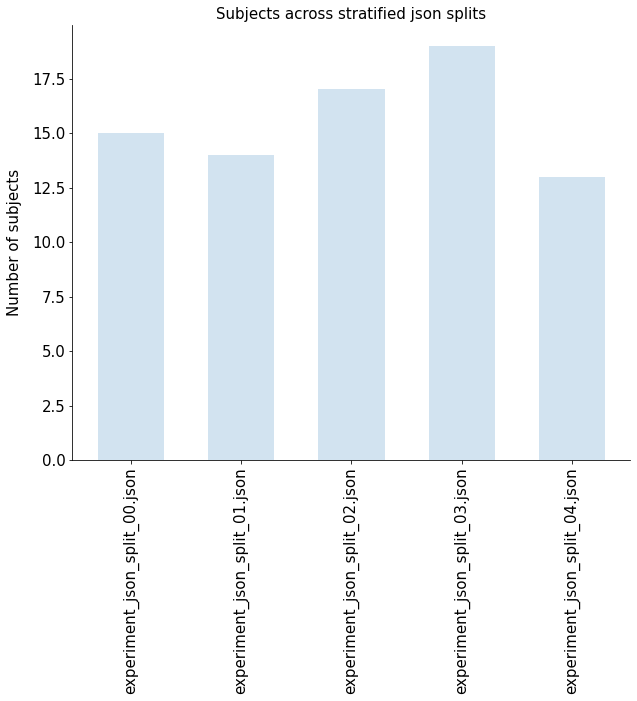

In [32]:
print('\n\n')
plt.figure(figsize=(10,8))
xpos=np.arange(len(np.unique(all_participants_exp_filename,return_counts=True)[0])) + 1
plt.gca().bar(xpos, np.unique(all_participants_exp_filename,return_counts=True)[1], align='center', width=0.6, alpha=0.2, ecolor='gray', capsize=4)
plt.xticks(xpos,np.unique(all_participants_exp_filename,return_counts=True)[0],rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Number of subjects',fontsize=15,labelpad=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Subjects across stratified json splits',fontsize=15)
plt.show()

# 6. Curve Fitting

In [33]:
def pf(x, upper_bound, intercept, slope):
    return upper_bound + (1 - upper_bound - 0.5) * (1 - np.exp(-1*(x/intercept)**slope))

In [34]:
@interact(upper_bound=(0.8,1.5,0.01), intercept=(15,75,1),slope=(-25,25,0.5))
def f(upper_bound=1.0,intercept=45,slope=2):
    y_s=pf(np.linspace(15,75,1000),upper_bound, intercept,slope)
    plt.figure(figsize=(8,6))
    plt.plot(np.linspace(15,75,1000),y_s,linewidth=3,color='gray',alpha=0.8,linestyle='--')
    plt.axhline(y=0.5,linestyle='dashed',color='red',label='chance')

    for i in beta_conditions:
        plt.axvline(i,color='k',linestyle='--',alpha=0.4)
    plt.axhline(0.75,color='k',linestyle='--',alpha=0.4)

    plt.ylim(0.4,1.05)
    plt.xticks(beta_conditions,fontsize=15)
    plt.yticks(fontsize=15)

    plt.xlabel('Beta values',fontsize=15)
    plt.ylabel('Accuracy',fontsize=15)


    plt.legend(loc=1)

    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)


    plt.title('Observation of a population Subject',fontsize=15)

    plt.show()

interactive(children=(FloatSlider(value=1.0, description='upper_bound', max=1.5, min=0.8, step=0.01), IntSlide…

In [35]:
def get_parameters(all_obs):
    parameters={}
    rejected_subjects=[]
    for i,obs in enumerate(all_obs):
        par0 = sy.array([0.8, 45.0, 1.0]) # use some good starting values, reasonable default is [0., 1.]
        try:
            par_h1, mcov_h1 = curve_fit(pf, beta_conditions,obs , par0, maxfev=10000)
            parameters[i] = par_h1
        except:
            rejected_subjects.append(i)

    rejected_subjects=np.array(rejected_subjects)
    
    return parameters,rejected_subjects


    

In [36]:

all_participants_parameters,rejected_subjects=get_parameters(all_participants_observation)


In [37]:
rejected_subjects

array([40, 55, 61])

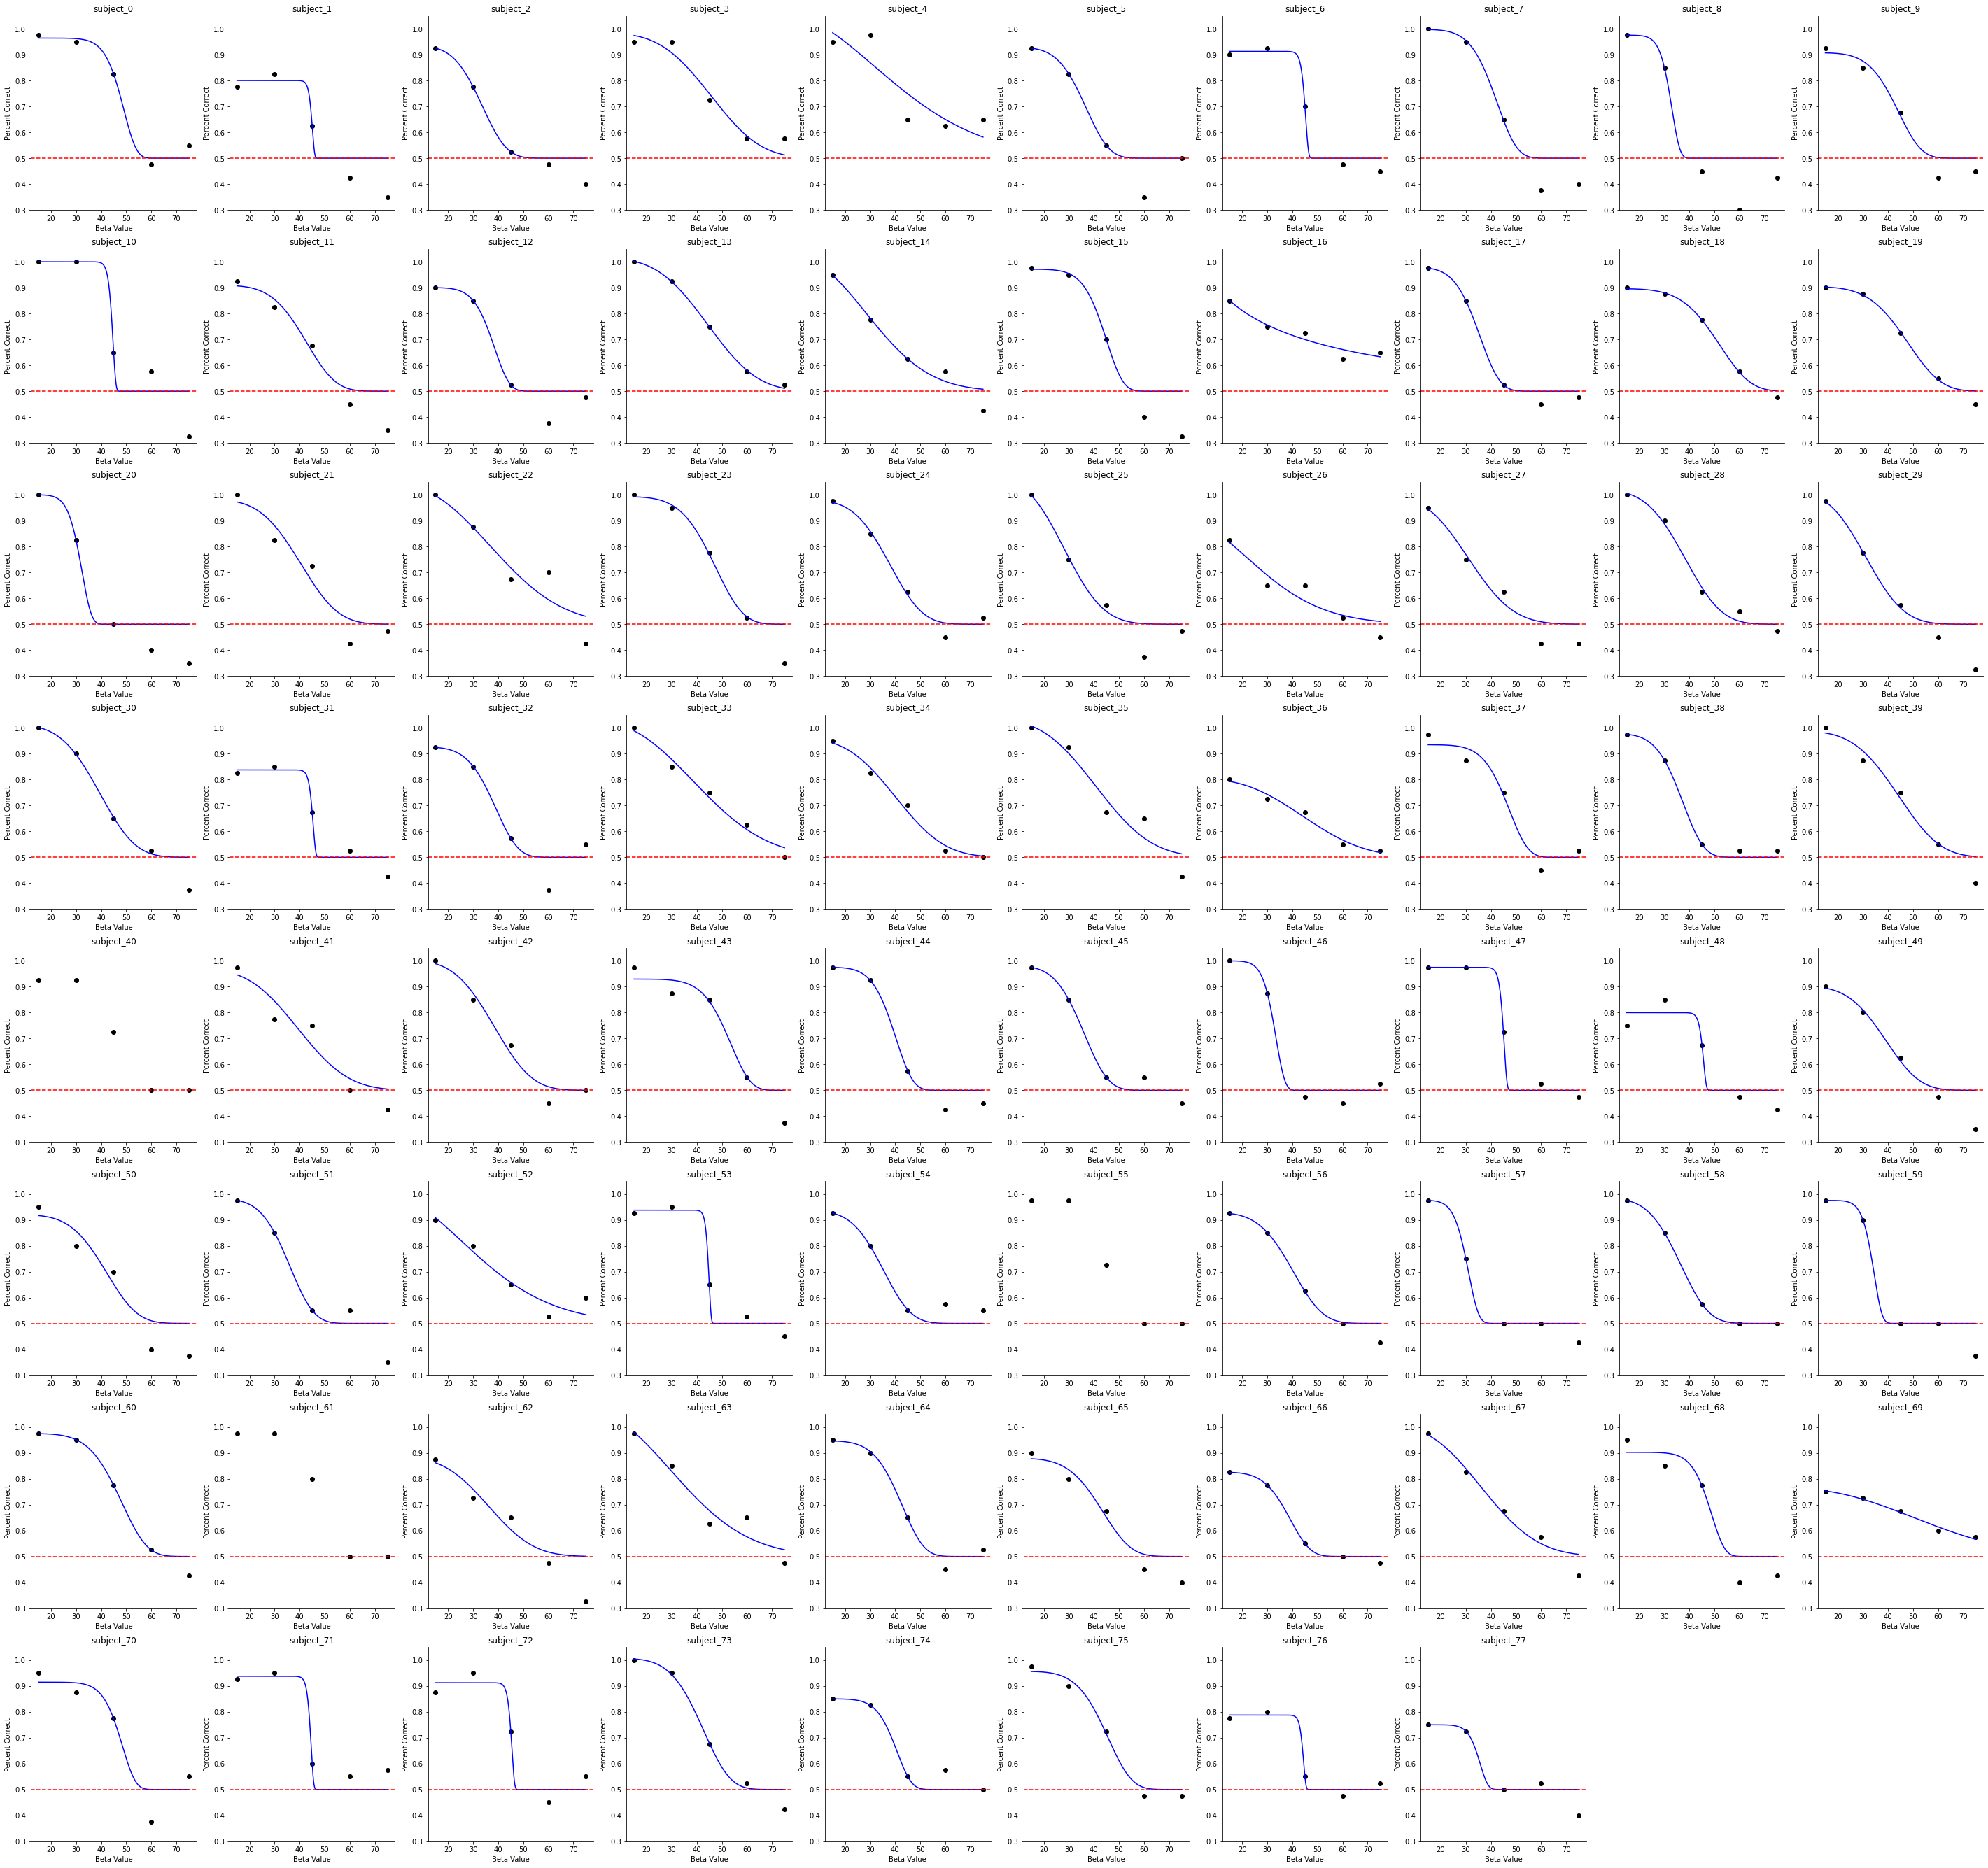

In [38]:
num_cols = 10
num_rows = len(all_participants_observation) // num_cols 
if(len(all_participants_observation)%num_cols!=0):
    num_rows+=1
    

plt.figure(figsize=(num_cols*5,num_rows*6))
for i in range(all_participants_observation.shape[0]):
    plt.subplot(num_rows,num_cols,i+1)
    plt.scatter(beta_conditions,all_participants_observation[i],color='k')
    
    if(i not in rejected_subjects):
        x_pos=np.linspace(beta_conditions[0],beta_conditions[-1],1000)
        plt.plot(x_pos,pf(x_pos,all_participants_parameters[i][0],all_participants_parameters[i][1],all_participants_parameters[i][2]),color='b')
        
    plt.axhline(y=0.5,linestyle='dashed',color='red',label='chance')
    plt.title('subject_'+str(i))
    plt.ylim(0.3,1.05)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel('Beta Value')
    plt.ylabel('Percent Correct')
    plt.show()
    


# 7. Image-wise percent correct plot (we will compare this to model signal strength)

In [39]:
# beta_conditions=np.unique(np.array(all_participants_df[0].betaVal))
# num_conditions=len(beta_conditions)

# all_participants_observation=[]

# for df in all_participants_df:
#     beta_val=np.array(df.betaVal)
#     response_val=np.array(df.responseCorrect)

#     acc_values=[]
#     for val in np.unique(np.array(df.betaVal)):
#         pos=np.where(beta_val==val)[0]
#         # print(val,np.mean(response_val[pos]))
#         acc_values.append(np.mean(response_val[pos]))
#     acc_values=np.array(acc_values)
#     all_participants_observation.append(acc_values)

# all_participants_observation=np.array(all_participants_observation)

# all_participants_observation.shape

In [40]:
all_participants_beta=[]
all_participants_filename=[]
all_participants_correct=[]



for df in all_participants_df:
    beta_val=np.array(df.betaVal)
    filename_val=np.array(df.filename)
    correct=np.array(df.responseCorrect)
    
    all_participants_beta.append(beta_val)
    all_participants_filename.append(filename_val)
    all_participants_correct.append(correct)
    

all_participants_beta=np.array(all_participants_beta)
all_participants_filename=np.array(all_participants_filename)
all_participants_correct=np.array(all_participants_correct)


unique_images=np.unique(all_participants_filename)


all_participants_correct.shape

(78, 200)

In [41]:
np.unique(all_participants_beta[0,:],return_counts=True)

(array([15, 30, 45, 60, 75]), array([40, 40, 40, 40, 40]))

In [42]:
len(unique_images)

1000

In [43]:
accuracy_image=[]
beta_image=[]

for img in unique_images:
    accuracy_image.append(np.mean(all_participants_correct[np.where(all_participants_filename==img)]))
    beta_image.append(np.mean(all_participants_beta[np.where(all_participants_filename==img)]))

In [44]:
len(beta_image)

1000

In [45]:
all_participants_beta.shape

(78, 200)

In [46]:
all_participants_filename.shape

(78, 200)

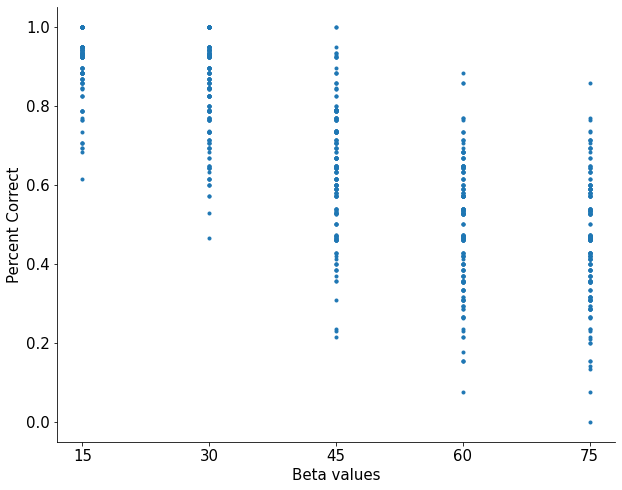

In [47]:
plt.figure(figsize=(10,8))
plt.plot(beta_image,accuracy_image,'.')

xtick_positions=[15,30,45,60,75]
plt.xticks(ticks=xtick_positions,fontsize=15)
plt.yticks(fontsize=15)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Beta values',fontsize=15)
plt.ylabel('Percent Correct',fontsize=15)
plt.show()

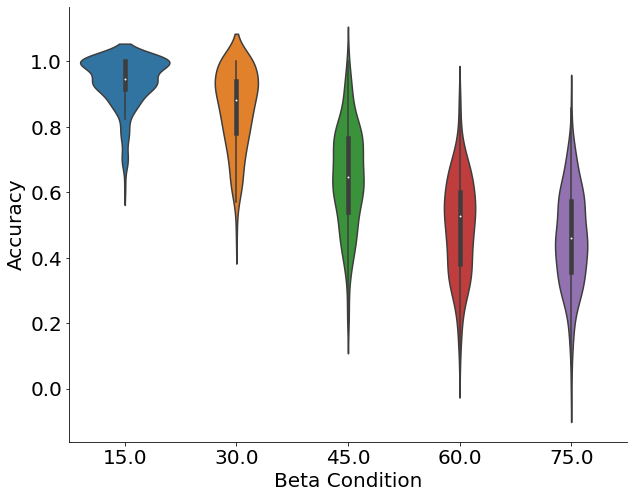

In [49]:
plt.figure(figsize=(10,8))
sns.violinplot(beta_image,accuracy_image)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.xlabel('Beta Condition',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# 8. Looking at the percent correct but sorting, to see that some images are hard and some images are easy

In [49]:
accuracy_image=[]
beta_image=[]



for img in unique_images:
    accuracy_image.append(np.mean(all_participants_correct[np.where(all_participants_filename==img)]))
    beta_image.append(np.mean(all_participants_beta[np.where(all_participants_filename==img)]))

    
accuracy_image=np.array(accuracy_image)
beta_image=np.array(beta_image)

In [50]:
sorted_accuracy_image=[]
sorted_beta_image=[]

for b in np.unique(all_participants_beta[0,:],return_counts=True)[0]:
    s_accuracy_image=accuracy_image[np.where(beta_image==b)]
    s_beta_image=beta_image[np.where(beta_image==b)]
    
    
    s_indices=np.argsort(s_accuracy_image)
    
    
    sorted_accuracy_image.append(s_accuracy_image[s_indices])
    sorted_beta_image.append(s_beta_image[s_indices])
    
    
sorted_accuracy_image=np.concatenate(sorted_accuracy_image)
sorted_beta_image=np.concatenate(sorted_beta_image)

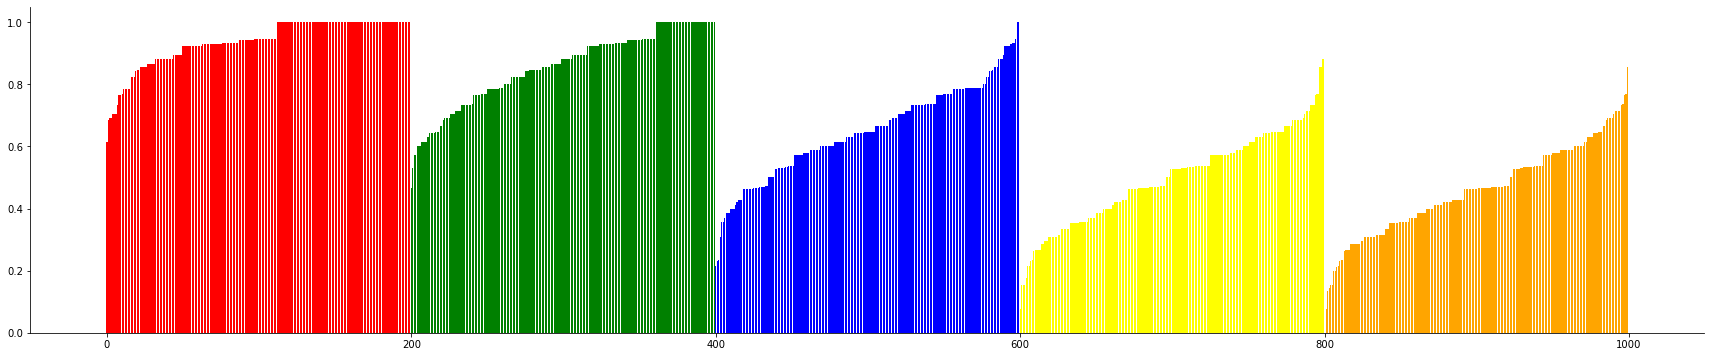

In [51]:
plt.figure(figsize=(30,6))  # Set the figure size

color_dict = {15: 'red', 30: 'green', 45: 'blue', 60: 'yellow', 75: 'orange'}
colors = [color_dict[label] for label in sorted_beta_image]

plt.bar(range(len(sorted_accuracy_image)), sorted_accuracy_image,color=colors)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

## 8A: Can we display these images?

In [52]:
import sys
sys.path.insert(1,'../contour-integration_models/')
from lib.field_stim_functions import *

ModuleNotFoundError: No module named 'lib'

In [83]:
psychophysics_folder='/home/jovyan/work/Datasets/contour_integration/model-psychophysics/experiment_1/'

In [84]:
accuracy_image=[]
beta_image=[]
recorder_image=[]


for img in unique_images:
    accuracy_image.append(np.mean(all_participants_correct[np.where(all_participants_filename==img)]))
    beta_image.append(np.mean(all_participants_beta[np.where(all_participants_filename==img)]))
    recorder_image.append(torch.load(os.path.join(psychophysics_folder,img)))

    
accuracy_image=np.array(accuracy_image)
beta_image=np.array(beta_image)
recorder_image=np.array(recorder_image)

In [85]:
sorted_accuracy_image=[]
sorted_beta_image=[]
sorted_recorder_image=[]

for b in np.unique(all_participants_beta[0,:],return_counts=True)[0]:
    s_accuracy_image=accuracy_image[np.where(beta_image==b)]
    s_beta_image=beta_image[np.where(beta_image==b)]
    s_recorder_image=recorder_image[np.where(beta_image==b)]
    
    
    s_indices=np.argsort(s_accuracy_image)
    
    
    sorted_accuracy_image.append(s_accuracy_image[s_indices])
    sorted_beta_image.append(s_beta_image[s_indices])
    sorted_recorder_image.append(s_recorder_image[s_indices])
    
    
sorted_accuracy_image=np.concatenate(sorted_accuracy_image)
sorted_beta_image=np.concatenate(sorted_beta_image)
sorted_recorder_image=np.concatenate(sorted_recorder_image)

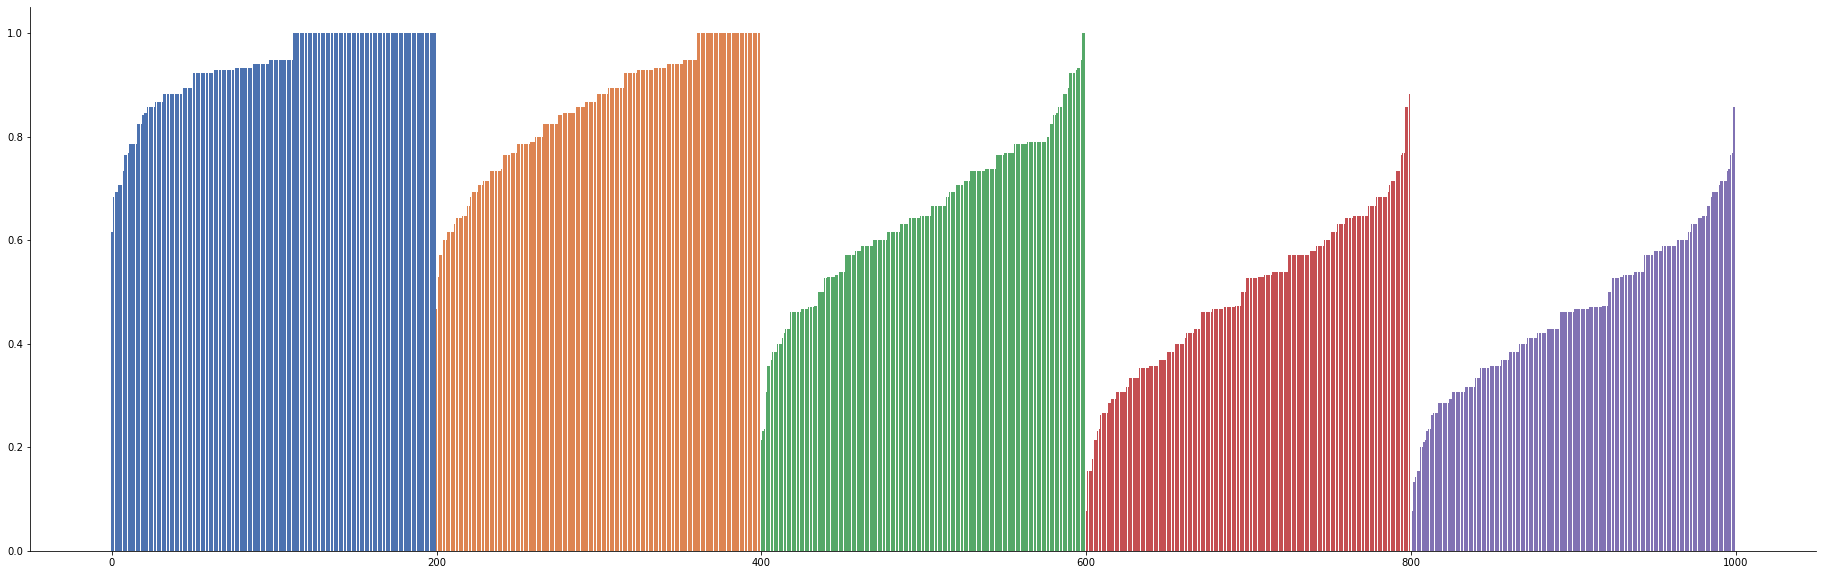

In [86]:
plt.figure(figsize=(32,10))  # Set the figure size

# color_dict = {15: 'red', 30: 'green', 45: 'blue', 60: 'yellow', 75: 'orange'}


deep_palette = sns.color_palette("deep", 5)
color_dict = {15: deep_palette[0], 
             30: deep_palette[1], 
             45: deep_palette[2], 
             60: deep_palette[3], 
             75: deep_palette[4]}


colors = [color_dict[label] for label in sorted_beta_image]

plt.bar(range(len(sorted_accuracy_image)), sorted_accuracy_image,color=colors)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.savefig('./contour_exp1/plots/human_e1_allimages.png',bbox_inches='tight',dpi=600)
plt.show()

In [87]:
@interact(select_beta=[15,30,45,60,75],img_num=(0,199,1))
def get_data(select_beta=15,img_num=0):
    print(sorted_accuracy_image[np.where(sorted_beta_image==select_beta)][img_num])
    
    image_recorder_dict=sorted_recorder_image[np.where(sorted_beta_image==select_beta)][img_num]
    img_contour, img_control, img_contour_background, img_control_background=image_renderer(image_recorder_dict)
    
    
    display(blend(show_path(image_recorder_dict['path_points'], image_recorder_dict['path_centers'], imHeight=image_recorder_dict['image_height'], imWidth=image_recorder_dict['image_width']),img_contour_background,0.7))
    display(img_contour_background)
    display(img_contour)
    
    img_contour_background.save('./contour_exp1/plots/demo_img_contour.png' ,dpi=(300,300))
    

interactive(children=(Dropdown(description='select_beta', options=(15, 30, 45, 60, 75), value=15), IntSlider(v…

# 9. Reliability estimates (Noise Ceilings)

In [88]:
all_participants_json.shape

(78,)

In [89]:
all_participants_filename.shape

(78, 200)

In [90]:
all_participants_correct.shape

(78, 200)

In [91]:
all_participants_beta.shape

(78, 200)

In [189]:
all_participant_idx

NameError: name 'all_participant_idx' is not defined

In [173]:
def get_percent_correct(all_participants_filename,all_participants_correct,all_participants_beta):
    unique_images=np.unique(all_participants_filename)

    accuracy_image=[]
    beta_image=[]

    for img in unique_images:
        accuracy_image.append(np.mean(all_participants_correct[np.where(all_participants_filename==img)]))
        beta_image.append(np.mean(all_participants_beta[np.where(all_participants_filename==img)]))
        
    return np.array(accuracy_image),np.array(beta_image),unique_images.shape




def stratified_split_half(all_participants_json,all_participants_filename,all_participants_correct,all_participants_beta,num_simulations=50,progress_bar_disable=False):
    
    img_file_name=[]
    all_participant_idx={}
    for i in range(len(all_participants_json)):
        participant_file_split_name=all_participants_json[i]['file_name'].split('/')[-1]

        img_file_name.append(participant_file_split_name)
        if(participant_file_split_name in all_participant_idx.keys()):
            all_participant_idx[participant_file_split_name].append(i)
        else:
            all_participant_idx[participant_file_split_name]=[]
            all_participant_idx[participant_file_split_name].append(i)




    ### All simulations 
    all_human_human_corr = []
    all_human_human_signal = []


    for simulation in tqdm(range(num_simulations),disable=progress_bar_disable):
        selected_1_total=np.array([])
        selected_2_total=np.array([])



        for key in all_participant_idx.keys():
            selected_1=np.random.choice(all_participant_idx[key],int(len(all_participant_idx[key])/2),replace=False)
            selected_2=np.setdiff1d(all_participant_idx[key] , selected_1)

            selected_1_total=np.concatenate((selected_1_total,selected_1))
            selected_2_total=np.concatenate((selected_2_total,selected_2))

        selected_1_total=selected_1_total.astype(int)
        selected_2_total=selected_2_total.astype(int)



        human_img_signal_1,_,human_unique_imgshape_1=get_percent_correct(all_participants_filename[selected_1_total,:],all_participants_correct[selected_1_total,:],all_participants_beta[selected_1_total,:])
        human_img_signal_2,_,human_unique_imgshape_2=get_percent_correct(all_participants_filename[selected_2_total,:],all_participants_correct[selected_2_total,:],all_participants_beta[selected_2_total,:])



        ## human human
        all_human_human_corr.append(np.corrcoef(human_img_signal_1,human_img_signal_2)[0][1])
        all_human_human_signal.append([human_img_signal_1,human_img_signal_2])



    all_human_human_corr=np.array(all_human_human_corr)
    all_human_human_signal=np.array(all_human_human_signal)

    spearman_all_human_human_corr=(2*all_human_human_corr)/(1+all_human_human_corr)
    return all_human_human_corr, spearman_all_human_human_corr, all_human_human_signal


In [174]:
pearson_all_human_human_corr, spearman_all_human_human_corr, all_human_human_signal=stratified_split_half(all_participants_json,all_participants_filename,all_participants_correct,all_participants_beta,num_simulations=1000,progress_bar_disable=False)




  0%|          | 0/1000 [00:00<?, ?it/s]

In [182]:
np.argmax(pearson_all_human_human_corr)

59

Text(0.5, 1.0, 'Pearson Correlation:   0.6883991116398798')

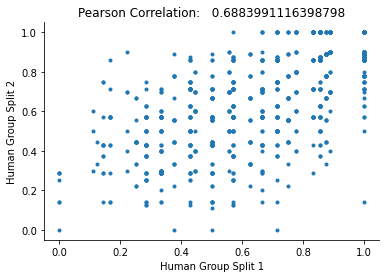

In [188]:

plt.plot(all_human_human_signal[59][0,:],all_human_human_signal[59][1,:],'.')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Human Group Split 1')
plt.ylabel('Human Group Split 2')
plt.title('Pearson Correlation:   ' + str(pearson_all_human_human_corr[59]))

In [168]:
np.mean(pearson_all_human_human_corr)

0.6461262556837142

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.0)

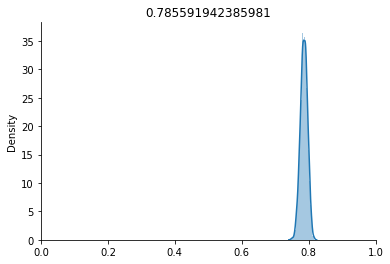

In [190]:
# plt.figure(figsize=(5,5))
sns.distplot(spearman_all_human_human_corr)
# plt.axvline(np.mean(spearman_all_human_human_corr),color='k',linestyle='--')
plt.title(np.mean(spearman_all_human_human_corr))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(0.0,1.0)

In [104]:
print(np.mean(spearman_all_human_human_corr))

0.7849634790966006


In [105]:
print(np.std(spearman_all_human_human_corr))

0.010362022774153951


In [106]:
1.96*(np.std(spearman_all_human_human_corr,ddof=1) / np.sqrt(len(spearman_all_human_human_corr)))

0.0006425661888595039

In [107]:
print(np.mean(spearman_all_human_human_corr) - np.percentile(spearman_all_human_human_corr, 2.5))
print(np.percentile(spearman_all_human_human_corr, 97.5) - np.mean(spearman_all_human_human_corr))

0.019729017768640333
0.019104092621710866


In [108]:
np.percentile(spearman_all_human_human_corr, 97.5)

0.8040675717183114

In [111]:
np.percentile(spearman_all_human_human_corr, 2.5)

0.7652344613279602

## Analytically computing the reliability

In [112]:
x=[0.66]
n=[50]

for i in range(10):
    x.append((x[-1]*2)/(1+x[-1]))
    n.append(n[-1]*2)

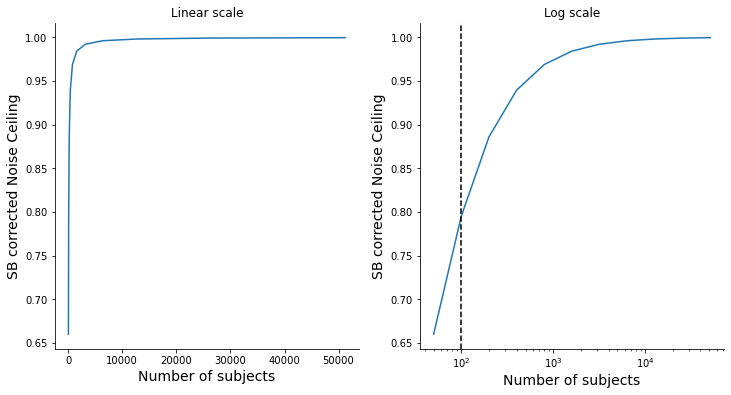

In [113]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(n,x)
plt.xlabel('Number of subjects',fontsize=14)
plt.ylabel('SB corrected Noise Ceiling',fontsize=14)
plt.title('Linear scale')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.subplot(1,2,2)
plt.plot(n,x)
plt.xscale("log")
plt.xlabel('Number of subjects',fontsize=14)
plt.ylabel('SB corrected Noise Ceiling',fontsize=14)
plt.axvline(100,color='k',linestyle='--')
plt.title('Log scale')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [114]:
for i in range(len(x)):
    print(n[i],'\t',x[i])

50 	 0.66
100 	 0.7951807228915663
200 	 0.8859060402684563
400 	 0.9395017793594305
800 	 0.9688073394495412
1600 	 0.9841565703634668
3200 	 0.9920150305307657
6400 	 0.9959915114359821
12800 	 0.9979917306556408
25600 	 0.9989948560279076
51200 	 0.9994971753083499


# 10. Can/Should we devise a strategy to get hold of images which show the maximum consistency across subjects, so we reduce the influence of internal noise?

# 11. Adding error bars (bootstrapped 95% CI) over each image

In [115]:
def bootstrap_sample(data, num_samples,num_simulations=100):
    """Creates a bootstrap sample from data with replacement.

    Args:
    data (np.array): The numpy array to sample from.
    num_samples (int): The number of samples to draw.

    Returns:
    np.array: The bootstrap sample as a numpy array.
    """
    bootstrapped_data=[]
    for sim in range(num_simulations):
        bootstrapped_data.append(np.random.choice(data, size=num_samples))
    bootstrapped_data=np.array(bootstrapped_data)
        
        
    
    return bootstrapped_data

In [116]:
accuracy_image=[]
beta_image=[]
bootstrapped_accuracy_image=[]



for img in tqdm(unique_images):
    accuracy_image.append(np.mean(all_participants_correct[np.where(all_participants_filename==img)]))
    beta_image.append(np.mean(all_participants_beta[np.where(all_participants_filename==img)]))
    
    t=np.mean(bootstrap_sample(all_participants_correct[np.where(all_participants_filename==img)],len(all_participants_correct[np.where(all_participants_filename==img)])),1)
    bootstrapped_accuracy_image.append(t)

    
accuracy_image=np.array(accuracy_image)
beta_image=np.array(beta_image)
bootstrapped_accuracy_image=np.array(bootstrapped_accuracy_image)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [117]:
bootstrapped_accuracy_image.shape

(1000, 100)

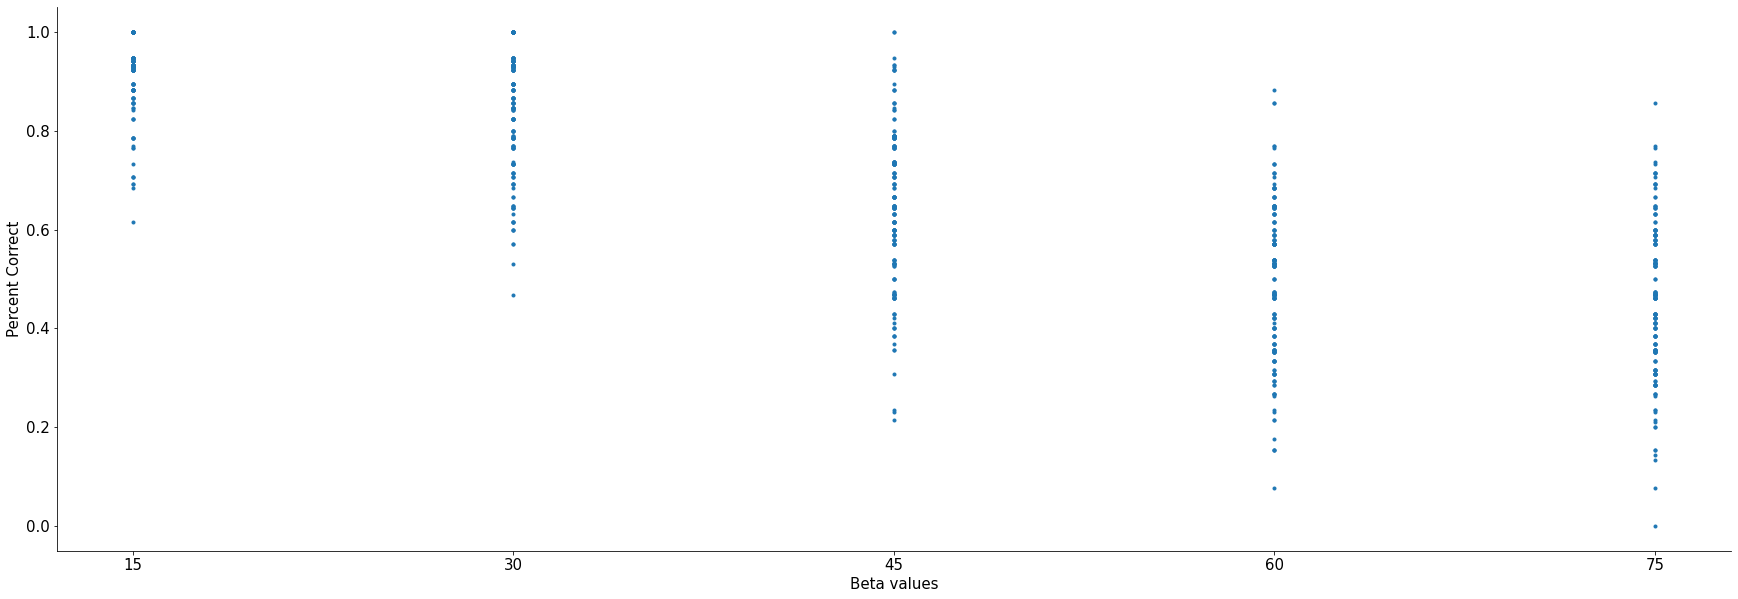

In [118]:
plt.figure(figsize=(30,10))
plt.plot(beta_image,accuracy_image,'.')

xtick_positions=[15,30,45,60,75]
plt.xticks(ticks=xtick_positions,fontsize=15)
plt.yticks(fontsize=15)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Beta values',fontsize=15)
plt.ylabel('Percent Correct',fontsize=15)
plt.show()

In [119]:
sorted_accuracy_image=[]
sorted_beta_image=[]
sorted_bootstrapped_accuracy_image=[]

for b in np.unique(all_participants_beta[0,:],return_counts=True)[0]:
    s_accuracy_image=accuracy_image[np.where(beta_image==b)]
    s_beta_image=beta_image[np.where(beta_image==b)]
    s_bootstrapped_accuracy_image=bootstrapped_accuracy_image[np.where(beta_image==b)]

    
    s_indices=np.argsort(s_accuracy_image)
    
    
    sorted_accuracy_image.append(s_accuracy_image[s_indices])
    sorted_beta_image.append(s_beta_image[s_indices])
    sorted_bootstrapped_accuracy_image.append(s_bootstrapped_accuracy_image[s_indices])
    
    
sorted_accuracy_image=np.concatenate(sorted_accuracy_image)
sorted_beta_image=np.concatenate(sorted_beta_image)
sorted_bootstrapped_accuracy_image=np.concatenate(sorted_bootstrapped_accuracy_image)

In [120]:
sorted_bootstrapped_accuracy_image.shape

(1000, 100)

## Actual means

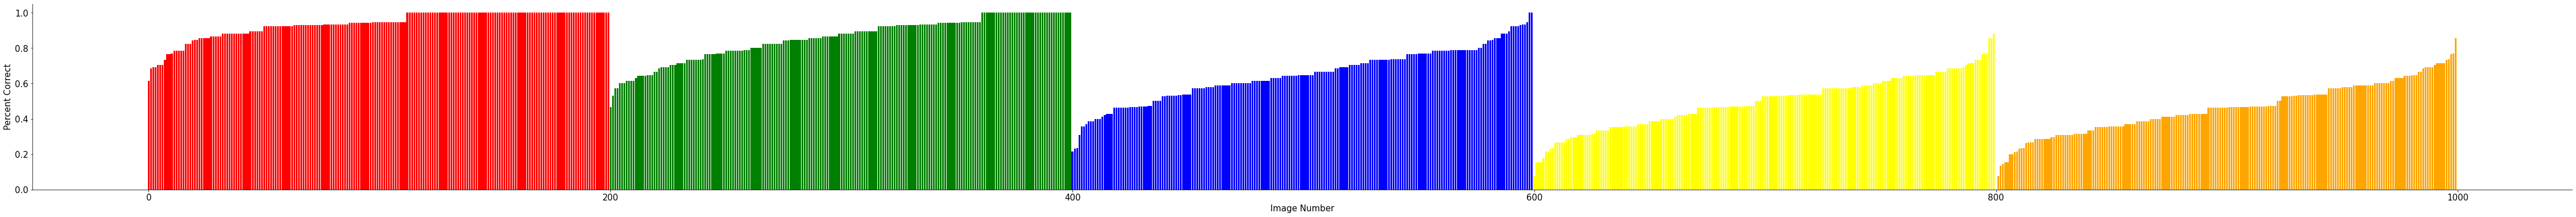

In [121]:
plt.figure(figsize=(80,6))  # Set the figure size

color_dict = {15: 'red', 30: 'green', 45: 'blue', 60: 'yellow', 75: 'orange'}
colors = [color_dict[label] for label in sorted_beta_image]

plt.bar(range(len(sorted_accuracy_image)), sorted_accuracy_image,color=colors)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Image Number',fontsize=15)
plt.ylabel('Percent Correct',fontsize=15)

# plt.savefig('./contour_exp1/percent_correct_nobars.png',bbox_inches='tight')
plt.show()


#### Assuming Normal distribution

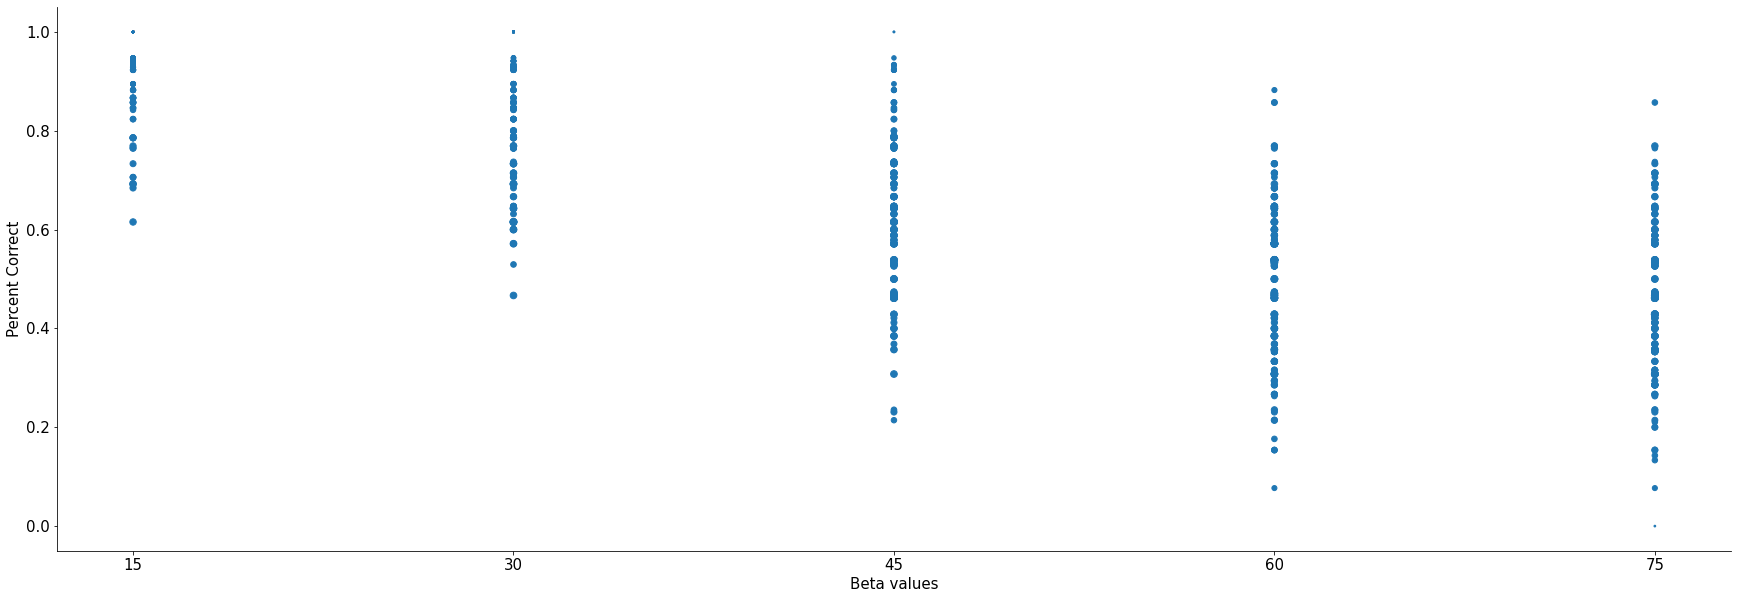

In [122]:
plt.figure(figsize=(30,10))

sizes = [np.std(dist,ddof=1) for dist in bootstrapped_accuracy_image]
sizes = (np.array(sizes) + 0.01) * 300

plt.scatter(beta_image,accuracy_image,s=sizes)

xtick_positions=[15,30,45,60,75]
plt.xticks(ticks=xtick_positions,fontsize=15)
plt.yticks(fontsize=15)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Beta values',fontsize=15)
plt.ylabel('Percent Correct',fontsize=15)
plt.show()

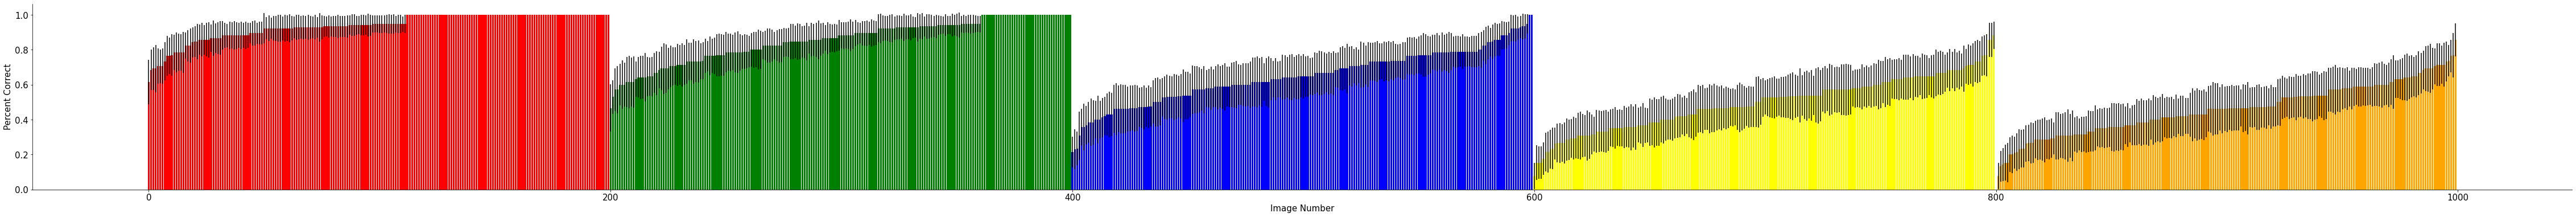

In [123]:
plt.figure(figsize=(80,6))  # Set the figure size

color_dict = {15: 'red', 30: 'green', 45: 'blue', 60: 'yellow', 75: 'orange'}
colors = [color_dict[label] for label in sorted_beta_image]



plt.bar(range(len(sorted_accuracy_image)), sorted_accuracy_image,color=colors,yerr=np.std(sorted_bootstrapped_accuracy_image,axis=1,ddof=1))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Image Number',fontsize=15)
plt.ylabel('Percent Correct',fontsize=15)

# plt.savefig('./contour_exp1/percent_correct_bars.png',bbox_inches='tight')
plt.show()


#### But they are not normally distributed

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

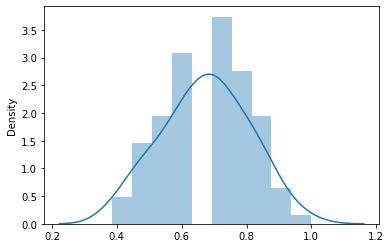

In [124]:
sns.distplot(sorted_bootstrapped_accuracy_image[3])

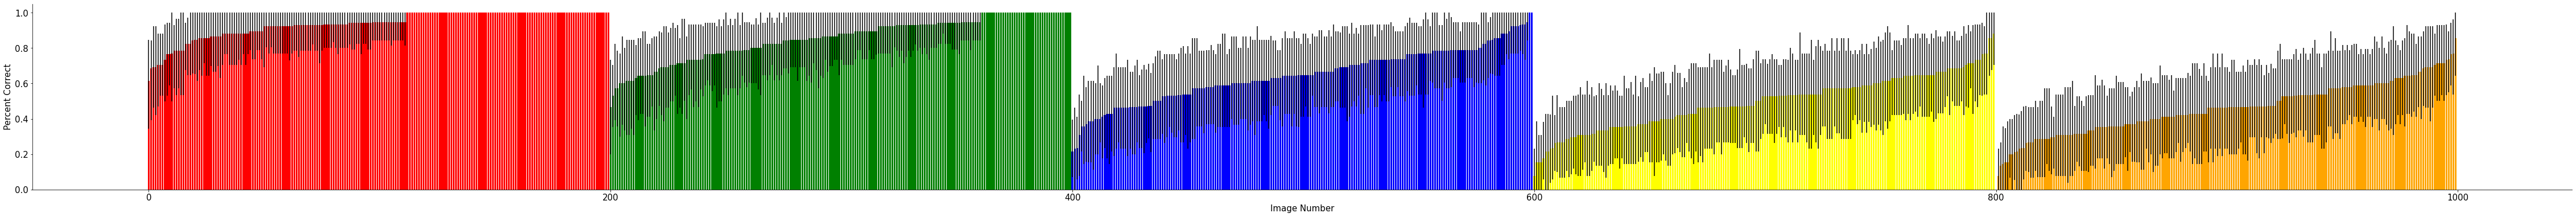

In [125]:
plt.figure(figsize=(80,6))  # Set the figure size

color_dict = {15: 'red', 30: 'green', 45: 'blue', 60: 'yellow', 75: 'orange'}
colors = [color_dict[label] for label in sorted_beta_image]


lower_bounds=np.expand_dims(np.percentile(sorted_bootstrapped_accuracy_image,2.5,1),0)
upper_bounds=np.expand_dims(np.percentile(sorted_bootstrapped_accuracy_image,97.5,1),0)

lower_error=(np.expand_dims(sorted_accuracy_image,0) - lower_bounds)
upper_error=(upper_bounds - np.expand_dims(sorted_accuracy_image,0))



plt.bar(range(len(sorted_accuracy_image)), sorted_accuracy_image,color=colors,yerr=np.concatenate((lower_error,upper_error)))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Image Number',fontsize=15)
plt.ylabel('Percent Correct',fontsize=15)
# plt.savefig('./contour_exp1/percent_correct_bootstrappedbars.png',bbox_inches='tight')
plt.show()

# 12. Saving/Loading variables

In [126]:
import pickle

def save_variables(filename, **variables):
    """
    Save multiple Python variables to a file.
    
    Parameters:
    - filename (str): the name of the file to save to.
    - **variables: Python variables to save.
    """
    with open(filename, 'wb') as f:
        pickle.dump(variables, f)

In [127]:
def load_variables(filename):
    """
    Load multiple Python variables from a file.
    
    Parameters:
    - filename (str): the name of the file to load from.
    
    Returns:
    - dict: A dictionary containing the loaded variables.
    """
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [128]:
all_participants_txt
all_participants_json
all_participants_exp_filename
all_participants_df
all_participants_observation


all_participants_beta
all_participants_correct
all_participants_filename


array([['psychophysics_recorder/psychophysics_recorder_id0265.pth',
        'psychophysics_recorder/psychophysics_recorder_id0042.pth',
        'psychophysics_recorder/psychophysics_recorder_id0038.pth', ...,
        'psychophysics_recorder/psychophysics_recorder_id0158.pth',
        'psychophysics_recorder/psychophysics_recorder_id0994.pth',
        'psychophysics_recorder/psychophysics_recorder_id0558.pth'],
       ['psychophysics_recorder/psychophysics_recorder_id0857.pth',
        'psychophysics_recorder/psychophysics_recorder_id0535.pth',
        'psychophysics_recorder/psychophysics_recorder_id0869.pth', ...,
        'psychophysics_recorder/psychophysics_recorder_id0335.pth',
        'psychophysics_recorder/psychophysics_recorder_id0830.pth',
        'psychophysics_recorder/psychophysics_recorder_id0742.pth'],
       ['psychophysics_recorder/psychophysics_recorder_id0565.pth',
        'psychophysics_recorder/psychophysics_recorder_id0504.pth',
        'psychophysics_recorder/psyc

In [129]:
len(all_participants_beta)

78

In [130]:
save_variables('./contour_exp1/analysis_data/analysis_data.pkl', all_participants_txt=all_participants_txt, all_participants_json=all_participants_json, all_participants_exp_filename=all_participants_exp_filename, 
               all_participants_df=all_participants_df, all_participants_observation=all_participants_observation,
              all_participants_beta=all_participants_beta,all_participants_correct=all_participants_correct,all_participants_filename=all_participants_filename)

In [131]:
data = load_variables('./contour_exp1/analysis_data/analysis_data.pkl')

# 13. Adding error bars (bootstrapped 95% CI) over each beta condition

In [132]:
def bootstrap_sample(data, num_samples,num_simulations=300):
    """Creates a bootstrap sample from data with replacement.

    Args:
    data (np.array): The numpy array to sample from.
    num_samples (int): The number of samples to draw.

    Returns:
    np.array: The bootstrap sample as a numpy array.
    """
    bootstrapped_data=[]
    for sim in range(num_simulations):
        bootstrapped_data.append(np.random.choice(data, size=num_samples))
    bootstrapped_data=np.array(bootstrapped_data)
        
        
    
    return bootstrapped_data

In [133]:
accuracy_image=[]
beta_image=[]
bootstrapped_accuracy_image=[]



for img in tqdm(unique_images):
    accuracy_image.append(np.mean(all_participants_correct[np.where(all_participants_filename==img)]))
    beta_image.append(np.mean(all_participants_beta[np.where(all_participants_filename==img)]))
    
    t=np.mean(bootstrap_sample(all_participants_correct[np.where(all_participants_filename==img)],len(all_participants_correct[np.where(all_participants_filename==img)])),1)
    bootstrapped_accuracy_image.append(t)

    
accuracy_image=np.array(accuracy_image)
beta_image=np.array(beta_image)
bootstrapped_accuracy_image=np.array(bootstrapped_accuracy_image)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [134]:
print(accuracy_image.shape)
print(beta_image.shape)
print(bootstrapped_accuracy_image.shape)

(1000,)
(1000,)
(1000, 300)


In [135]:
beta_image.shape

(1000,)

In [136]:
condition_accuracy_image=np.empty((0,200))
condition_bootstrapped_accuracy_image=np.empty((0,200,300))
condition_beta=[]

for b in np.unique(beta_image):
    condition_beta.append(b)
    condition_bootstrapped_accuracy_image=np.concatenate((condition_bootstrapped_accuracy_image,np.expand_dims(bootstrapped_accuracy_image[np.where(beta_image==b)[0],:],0)))
    condition_accuracy_image=np.concatenate((condition_accuracy_image,np.expand_dims(accuracy_image[np.where(beta_image==b)[0]],0)))

In [137]:
print(condition_accuracy_image.shape)

print(condition_bootstrapped_accuracy_image.shape)

(5, 200)
(5, 200, 300)


In [138]:
condition_bootstrapped_accuracy_image=np.mean(condition_bootstrapped_accuracy_image,1)
condition_accuracy_image=np.mean(condition_accuracy_image,1)

In [139]:
print(condition_accuracy_image.shape)

print(condition_bootstrapped_accuracy_image.shape)

(5,)
(5, 300)


In [140]:
print(condition_beta)

[15.0, 30.0, 45.0, 60.0, 75.0]


In [141]:
np.mean(condition_bootstrapped_accuracy_image,1)

array([0.93679721, 0.85461909, 0.64663479, 0.49621441, 0.45912325])

In [142]:
1.96*(np.std(condition_bootstrapped_accuracy_image,1,ddof=1)/np.sqrt(condition_bootstrapped_accuracy_image.shape[1]))

array([0.00050487, 0.00062249, 0.00085473, 0.00106147, 0.00094001])

In [143]:
np.mean(condition_bootstrapped_accuracy_image,1) - np.percentile(condition_bootstrapped_accuracy_image, 2.5, axis=1)

array([0.00864498, 0.01030065, 0.01434338, 0.01910868, 0.01570306])

In [144]:
np.percentile(condition_bootstrapped_accuracy_image, 97.5, axis=1) - np.mean(condition_bootstrapped_accuracy_image,1)

array([0.00778799, 0.01088316, 0.01388976, 0.01647814, 0.01590823])

In [145]:
# plt.figure(figsize=(10,12))


# plt.errorbar(np.arange(len(np.mean(condition_bootstrapped_accuracy_image,1))), np.mean(condition_bootstrapped_accuracy_image,1), 
#              yerr=[np.mean(condition_bootstrapped_accuracy_image,1) - np.percentile(condition_bootstrapped_accuracy_image, 2.5, axis=1),np.percentile(condition_bootstrapped_accuracy_image, 97.5, axis=1) - np.mean(condition_bootstrapped_accuracy_image,1)], 
#              capsize=5,elinewidth=4,linestyle='-', marker='.', color='gray', markersize=10, 
#              label='supervised regular finetune', alpha=0.8, linewidth=4)






# for i in range(len(np.mean(condition_bootstrapped_accuracy_image,1))):
#     plt.axvline(i,linestyle='--',alpha=0.1,color='k')

# plt.xticks(np.arange(len(np.mean(condition_bootstrapped_accuracy_image,1))),condition_beta,fontsize=20)
# plt.yticks(fontsize=20) 


# plt.xlabel('Beta Condition',fontsize=20)
# plt.ylabel('Percent Correct',fontsize=20)

# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

# plt.show()
    
    

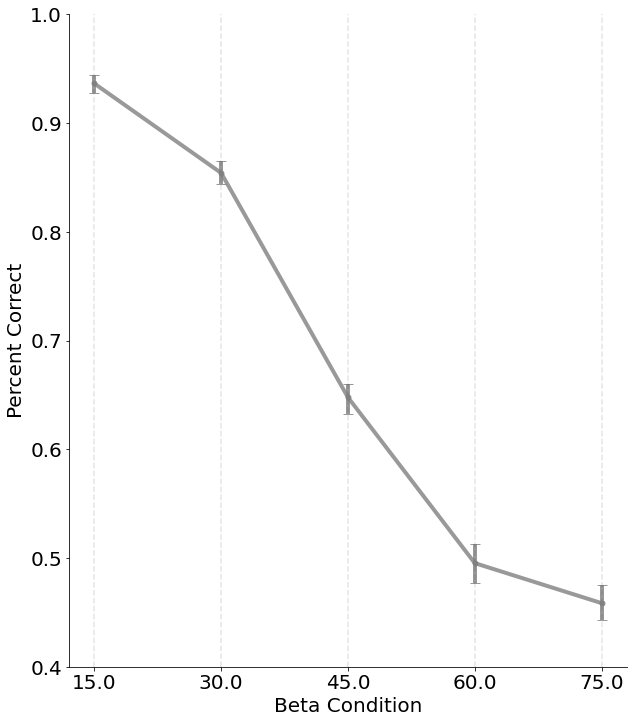

In [146]:
plt.figure(figsize=(10,12))





plt.errorbar(np.arange(len(condition_accuracy_image)), condition_accuracy_image, 
             yerr=[condition_accuracy_image - np.percentile(condition_bootstrapped_accuracy_image, 2.5, axis=1),np.percentile(condition_bootstrapped_accuracy_image, 97.5, axis=1) - condition_accuracy_image], 
             capsize=5,elinewidth=4,linestyle='-', marker='.', color='gray', markersize=10, 
             label='supervised regular finetune', alpha=0.8, linewidth=4)






for i in range(len(condition_accuracy_image)):
    plt.axvline(i,linestyle='--',alpha=0.1,color='k')

plt.xticks(np.arange(len(condition_accuracy_image)),condition_beta,fontsize=20)
plt.yticks(fontsize=20) 

plt.ylim(0.4,1.0)

plt.xlabel('Beta Condition',fontsize=20)
plt.ylabel('Percent Correct',fontsize=20)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('./dev/mauscript_figures/human_e1.png',bbox_inches='tight',dpi=600)

plt.show()
    
    

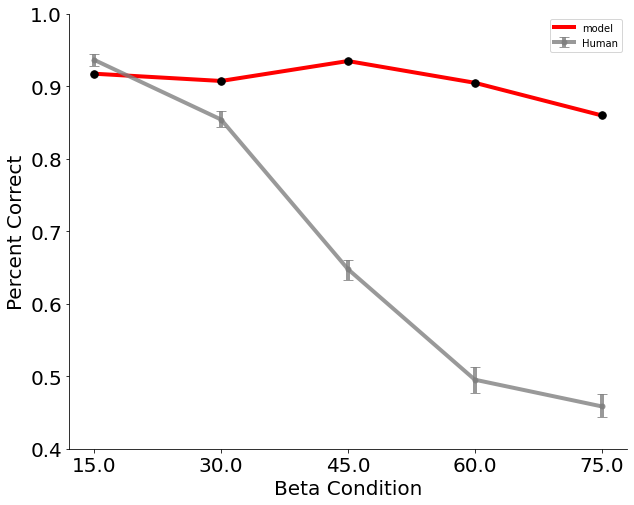

In [159]:
plt.figure(figsize=(10,8))



broad_unique_beta_acc=[0.9175, 0.9075, 0.935, 0.905, 0.86]

plt.errorbar(np.arange(len(condition_accuracy_image)), condition_accuracy_image, 
             yerr=[condition_accuracy_image - np.percentile(condition_bootstrapped_accuracy_image, 2.5, axis=1),np.percentile(condition_bootstrapped_accuracy_image, 97.5, axis=1) - condition_accuracy_image], 
             capsize=5,elinewidth=4,linestyle='-', marker='.', color='gray', markersize=10, 
             label='Human', alpha=0.8, linewidth=4)



plt.plot(np.arange(len(condition_accuracy_image)),broad_unique_beta_acc,linewidth=4,label='model',color='r')
plt.plot(np.arange(len(condition_accuracy_image)),broad_unique_beta_acc,'.',color='k',markersize=15)


# for i in range(len(condition_accuracy_image)):
#     plt.axvline(i,linestyle='--',alpha=0.1,color='k')

plt.xticks(np.arange(len(condition_accuracy_image)),condition_beta,fontsize=20)
plt.yticks(fontsize=20) 

plt.ylim(0.4,1.0)

plt.xlabel('Beta Condition',fontsize=20)
plt.ylabel('Percent Correct',fontsize=20)

plt.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('./contour_exp1/plots/human_e1_broad.png',bbox_inches='tight',dpi=600)

plt.show()
    
    

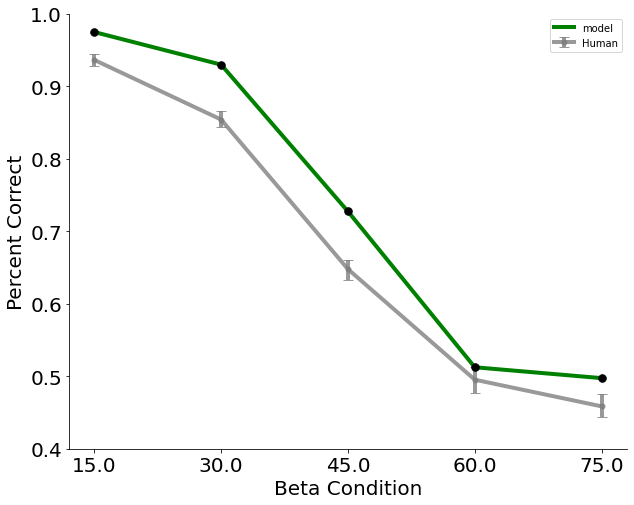

In [160]:
plt.figure(figsize=(10,8))



narrow_unique_beta_acc= [0.975 , 0.93  , 0.7275, 0.5125, 0.4975]

plt.errorbar(np.arange(len(condition_accuracy_image)), condition_accuracy_image, 
             yerr=[condition_accuracy_image - np.percentile(condition_bootstrapped_accuracy_image, 2.5, axis=1),np.percentile(condition_bootstrapped_accuracy_image, 97.5, axis=1) - condition_accuracy_image], 
             capsize=5,elinewidth=4,linestyle='-', marker='.', color='gray', markersize=10, 
             label='Human', alpha=0.8, linewidth=4)



plt.plot(np.arange(len(condition_accuracy_image)),narrow_unique_beta_acc,linewidth=4,label='model',color='g')
plt.plot(np.arange(len(condition_accuracy_image)),narrow_unique_beta_acc,'.',color='k',markersize=15)


# for i in range(len(condition_accuracy_image)):
#     plt.axvline(i,linestyle='--',alpha=0.1,color='k')

plt.xticks(np.arange(len(condition_accuracy_image)),condition_beta,fontsize=20)
plt.yticks(fontsize=20) 

plt.ylim(0.4,1.0)

plt.xlabel('Beta Condition',fontsize=20)
plt.ylabel('Percent Correct',fontsize=20)

plt.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('./contour_exp1/plots/human_e1_narrow.png',bbox_inches='tight',dpi=600)

plt.show()
    
    